# Task 3: Fake News Detection

In [1]:
import pandas as pd
import numpy as np
import nltk
import re
import string
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

### Load Data

In [2]:
df= pd.read_csv('/content/news.csv')
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


### Standardize text columns

In [3]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df['combined_text'] = df['title'] + " " + df['text']
df['label'] = df['label'].map({'FAKE': 0, 'REAL': 1})
df.head()

,title,text,label,combined_text
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",0,You Can Smell Hillary’s Fear Daniel Greenfield...
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,0,Watch The Exact Moment Paul Ryan Committed Pol...
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,1,Kerry to go to Paris in gesture of sympathy U....
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",0,Bernie supporters on Twitter erupt in anger ag...
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,1,The Battle of New York: Why This Primary Matte...


### Download Required Packages

In [4]:
nltk.download('punkt', force=True)
nltk.download('stopwords', force=True)
nltk.download('wordnet', force=True)
nltk.download('omw-1.4', force=True)
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

### Data Preprocessing

In [5]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)  # Remove digits
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    tokens = nltk.word_tokenize(text)  # Tokenize
    tokens = [word for word in tokens if word not in stop_words]  # Remove stopwords
    tokens = [lemmatizer.lemmatize(word) for word in tokens]  # Lemmatization
    return ' '.join(tokens)

df['processed_text'] = df['combined_text'].apply(preprocess_text)


In [6]:
df['label'] = df['label'].astype('category').cat.codes

### Vectorize (TF-IDF)

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Vectorization
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['processed_text']).toarray()
y = df['label']

### Train/Test split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Train models

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import f1_score

# Model training (Choose One)
model = LogisticRegression(max_iter=1000)
# model = LinearSVC()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

### Evaluate (Accuracy & F1 + report + confusion matrix)

In [10]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score:", f1)

Accuracy: 0.9179163378058406
              precision    recall  f1-score   support

           0       0.91      0.93      0.92       628
           1       0.93      0.91      0.92       639

    accuracy                           0.92      1267
   macro avg       0.92      0.92      0.92      1267
weighted avg       0.92      0.92      0.92      1267

F1 Score: 0.9179122470812149


## Bonus: Word Clouds for Fake vs Real

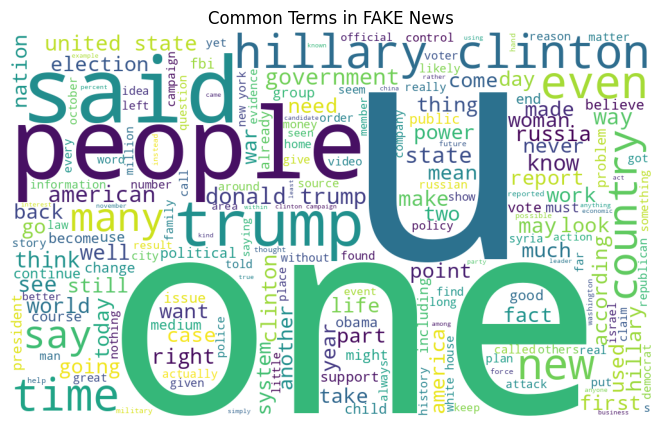

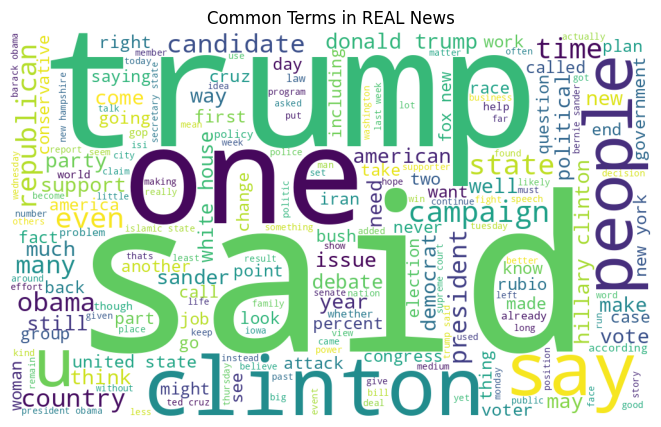

In [11]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

fake_text = " ".join(df.loc[df['label']==0, 'processed_text'].tolist())
real_text = " ".join(df.loc[df['label']==1, 'processed_text'].tolist())

wc_fake = WordCloud(width=1000, height=600, background_color="white").generate(fake_text)
wc_real = WordCloud(width=1000, height=600, background_color="white").generate(real_text)

plt.figure(figsize=(12,5))
plt.imshow(wc_fake); plt.axis("off"); plt.title("Common Terms in FAKE News")
plt.show()

plt.figure(figsize=(12,5))
plt.imshow(wc_real); plt.axis("off"); plt.title("Common Terms in REAL News")
plt.show()
